In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\ganji bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_ganji.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-1.46,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-1.44,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-1.42,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-1.46,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-1.46,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-1.44,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-1.42,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-1.46,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-1.46,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44
14665,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-2.17,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81
14666,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.95,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44
14667,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-1.52,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81,0
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42,0
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18,0
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95,0
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44,0
14665,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81,0
14666,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44,0
14667,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-1.954591
1,-79,-1.960165
2,-78,-1.966735
3,-77,-1.954670
4,-76,-1.958529
...,...,...
94,14,-1.950377
95,15,-1.944175
96,16,-1.963481
97,17,-1.951034


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-1.961008,150
1,-79,-1.967088,151
2,-78,-1.964322,152
3,-77,-1.961254,153
4,-76,-1.970356,154
...,...,...,...
94,14,-1.980517,244
95,15,-1.960736,245
96,16,-1.958850,246
97,17,-1.979881,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


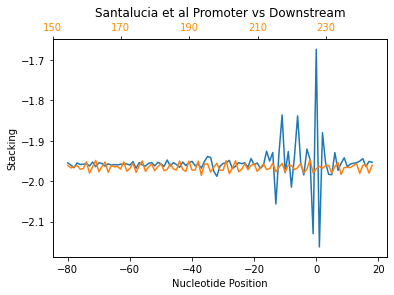

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Santalucia et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44,0
29334,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81,0
29335,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44,0
29336,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81,0


# Prediction using machine learning

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix, matthews_corrcoef

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [87]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8377641445126107, Precision: 0.8689393939393939, Recall: 0.7910344827586206, F1 Score: 0.828158844765343, MCC: 0.6778239568683522, Specificity: 0.883423180592992
Fold 2: Accuracy: 0.8360599863667348, Precision: 0.8540899042004422, Recall: 0.8037447988904299, F1 Score: 0.828152911754198, MCC: 0.6728337284302869, Specificity: 0.8672922252010724
Fold 3: Accuracy: 0.8401499659168371, Precision: 0.8730277986476334, Recall: 0.7948016415868673, F1 Score: 0.8320802005012532, MCC: 0.6829289380481617, Specificity: 0.8851902173913043
Fold 4: Accuracy: 0.8479890933878664, Precision: 0.8808446455505279, Recall: 0.8021978021978022, F1 Score: 0.8396836808051761, MCC: 0.6985109461267943, Specificity: 0.8930987821380244
Fold 5: Accuracy: 0.8323108384458078, Precision: 0.8794007490636704, Recall: 0.7800664451827243, F1 Score: 0.8267605633802816, MCC: 0.6698936505072259, Specificity: 0.887333799860042
Fold 6: Accuracy: 0.8357191547375596, Precision: 0.875748502994012, Recall: 0.787348

In [88]:
accuracy_list

[0.8377641445126107,
 0.8360599863667348,
 0.8401499659168371,
 0.8479890933878664,
 0.8323108384458078,
 0.8357191547375596,
 0.8316291751874574,
 0.8432174505794138,
 0.8329355608591885,
 0.8356631435390385]

In [89]:
precision_list

[0.8689393939393939,
 0.8540899042004422,
 0.8730277986476334,
 0.8808446455505279,
 0.8794007490636704,
 0.875748502994012,
 0.8697956093868282,
 0.8775510204081632,
 0.8693353474320241,
 0.8736762481089259]

In [90]:
recall_list

[0.7910344827586206,
 0.8037447988904299,
 0.7948016415868673,
 0.8021978021978022,
 0.7800664451827243,
 0.7873485868102288,
 0.7811012916383413,
 0.7957505140507197,
 0.7840599455040872,
 0.7857142857142857]

In [91]:
specificity_list

[0.883423180592992,
 0.8672922252010724,
 0.8851902173913043,
 0.8930987821380244,
 0.887333799860042,
 0.8853591160220995,
 0.8824333561175667,
 0.8901694915254237,
 0.8819112627986349,
 0.885850991114149]

In [92]:
f1_score_list 

[0.828158844765343,
 0.828152911754198,
 0.8320802005012532,
 0.8396836808051761,
 0.8267605633802816,
 0.8291991495393338,
 0.8230659025787966,
 0.8346513299784328,
 0.8244985673352435,
 0.8273638968481375]

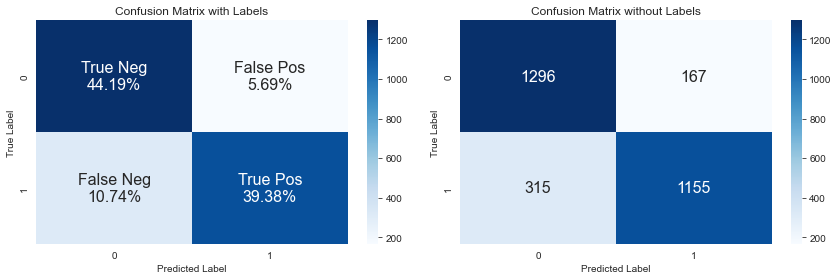

In [93]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [94]:
print(mean(accuracy_list))

0.8373438513532515


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


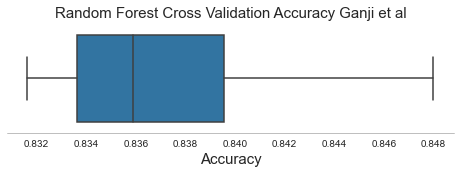

In [95]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [96]:
clf.feature_importances_

array([0.00462908, 0.00449222, 0.00459236, 0.00469582, 0.00443471,
       0.00415784, 0.00431348, 0.00493813, 0.00443922, 0.00471124,
       0.00460238, 0.00452572, 0.00438956, 0.00444211, 0.00449424,
       0.00429831, 0.0043651 , 0.00511908, 0.00457545, 0.00427253,
       0.00464064, 0.00415046, 0.00409862, 0.00442812, 0.00446553,
       0.00419609, 0.00455949, 0.00438668, 0.004827  , 0.0046219 ,
       0.00480955, 0.00464516, 0.00438345, 0.0042343 , 0.00432156,
       0.00422247, 0.00434193, 0.00449388, 0.00442344, 0.00436306,
       0.00492678, 0.00528294, 0.00452804, 0.00414962, 0.00460727,
       0.00470585, 0.00435058, 0.00446406, 0.00474779, 0.00426844,
       0.00462852, 0.00484661, 0.00452754, 0.00460298, 0.00467953,
       0.00440315, 0.00439469, 0.00442586, 0.00473652, 0.00457091,
       0.00431468, 0.00438743, 0.00558152, 0.00514866, 0.00549848,
       0.00635152, 0.00668288, 0.01692748, 0.06247782, 0.2361058 ,
       0.02252646, 0.01302501, 0.02153736, 0.04237727, 0.01522

In [97]:
clf.feature_importances_.shape

(99,)

In [98]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

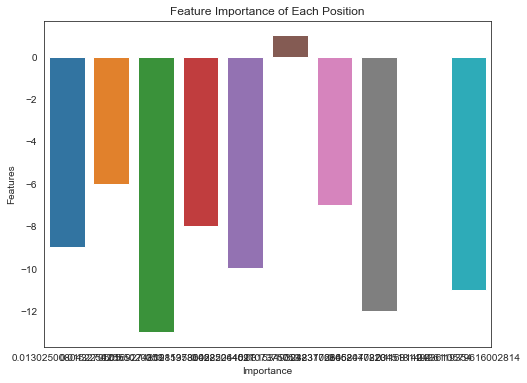

In [99]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [100]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004629,-80
1,1,0.004492,-79
2,2,0.004592,-78
3,3,0.004696,-77
4,4,0.004435,-76
...,...,...,...
94,94,0.004272,14
95,95,0.004222,15
96,96,0.004816,16
97,97,0.004503,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

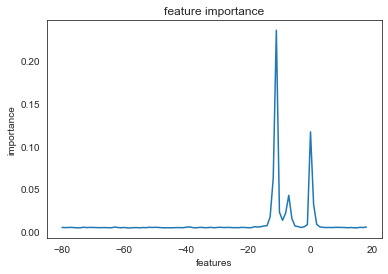

In [101]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [102]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8356631435390385
Precision: 0.8736762481089259
Recall: 0.7857142857142857
f1_score: 0.8273638968481375


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


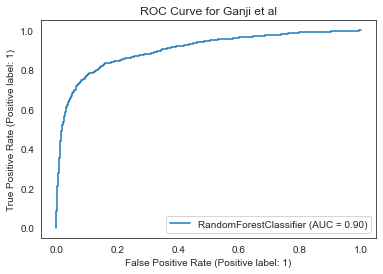

In [103]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


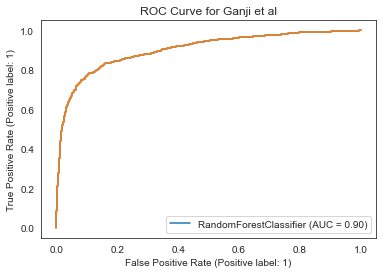

In [104]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_ganji_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [241]:
!pip install shap

In [242]:
import shap


In [243]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [244]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[3991, 4378, 3910, 8142, 4635, 4780, 6472, 2610, 6965, 6878, 4977, 3854, 7597, 5175, 4294, 1012, 505, 3980, 9778, 9504, 737, 1363, 3189, 1775, 5585, 1321, 4121, 232, 1924, 7402, 6263, 8092, 2495, 3543, 4993, 2939, 4785, 77, 5234, 6919]


In [245]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [246]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [247]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [248]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

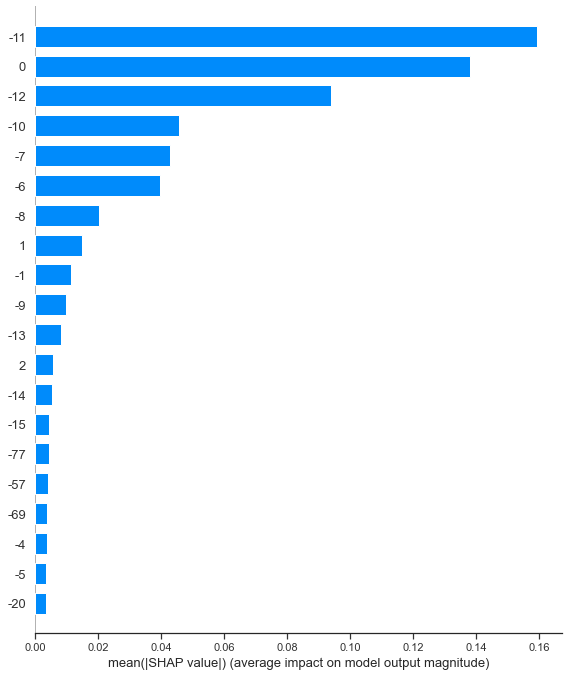

In [249]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

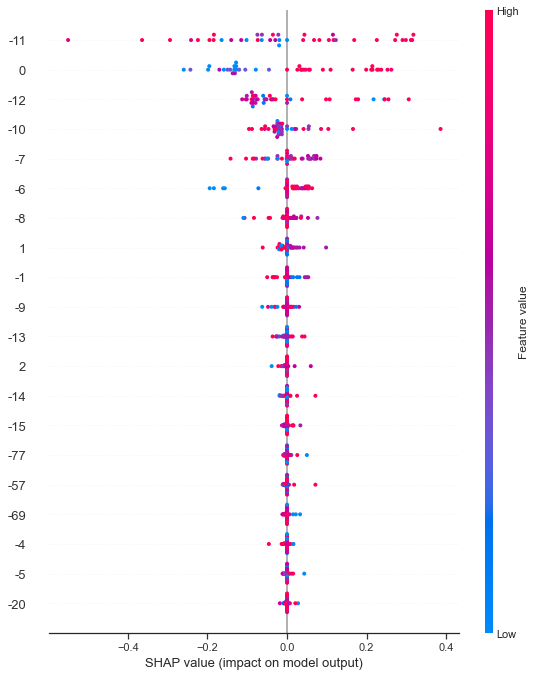

In [250]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

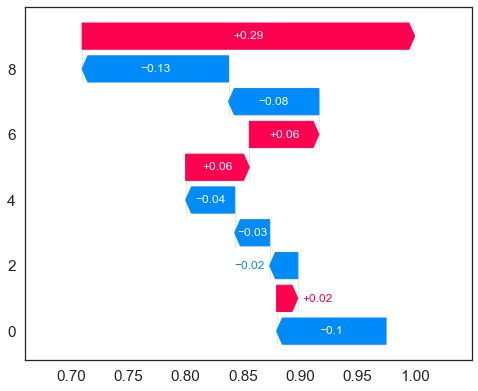

In [253]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [254]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [255]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [105]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\ganji\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\ganji\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\ganji\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\ganji\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [106]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



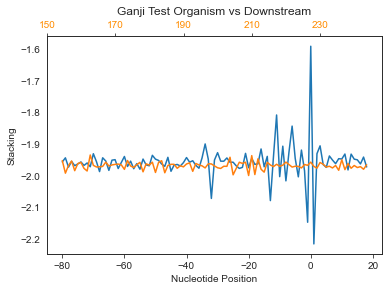

In [107]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ganji Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [108]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [109]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [110]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8893939393939394


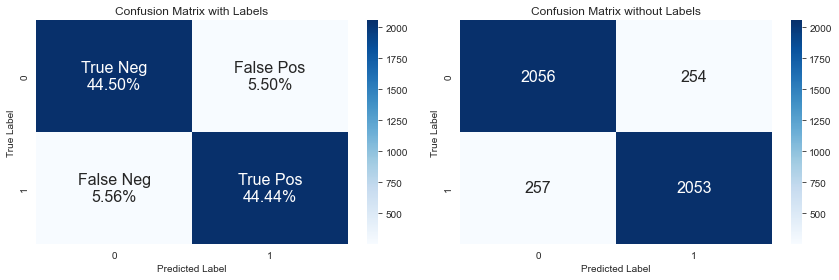

In [111]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [112]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [113]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8939393939393939, Precision: 0.9026548672566371, Recall: 0.8831168831168831, F1 Score: 0.8927789934354485, MCC: 0.7880634161047002, Specificity: 0.9047619047619048
Fold 2/10
 Accuracy: 0.8831168831168831, Precision: 0.8672199170124482, Recall: 0.9047619047619048, F1 Score: 0.885593220338983, MCC: 0.7669527486445458, Specificity: 0.8614718614718615
Fold 3/10
 Accuracy: 0.8636363636363636, Precision: 0.8620689655172413, Recall: 0.8658008658008658, F1 Score: 0.8639308855291576, MCC: 0.7272795420152303, Specificity: 0.8614718614718615
Fold 4/10
 Accuracy: 0.8917748917748918, Precision: 0.8851063829787233, Recall: 0.9004329004329005, F1 Score: 0.8927038626609441, MCC: 0.783667281502953, Specificity: 0.8831168831168831
Fold 5/10
 Accuracy: 0.9199134199134199, Precision: 0.9217391304347826, Recall: 0.9177489177489178, F1 Score: 0.9197396963123645, MCC: 0.8398347092318731, Specificity: 0.922077922077922
Fold 6/10
 Accuracy: 0.8874458874458875, Precision: 0.89082969432314

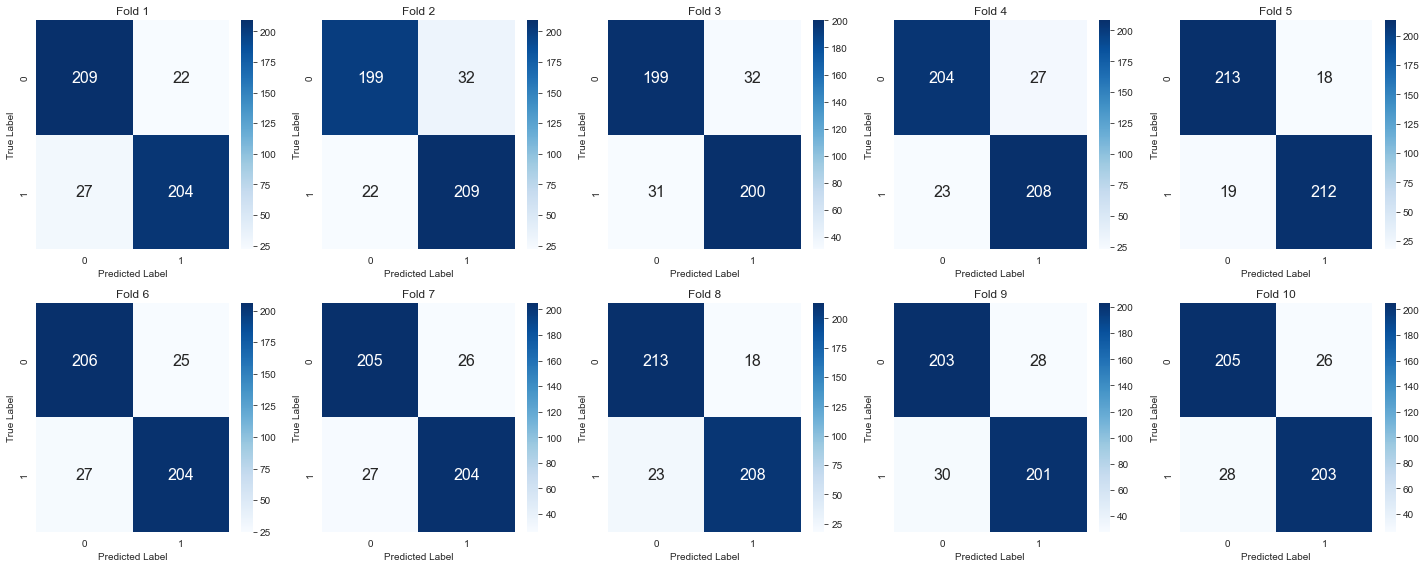

In [114]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [115]:
test_accuracy

[0.8939393939393939,
 0.8831168831168831,
 0.8636363636363636,
 0.8917748917748918,
 0.9199134199134199,
 0.8874458874458875,
 0.8852813852813853,
 0.9112554112554112,
 0.8744588744588745,
 0.8831168831168831]

In [116]:
test_precision

[0.9026548672566371,
 0.8672199170124482,
 0.8620689655172413,
 0.8851063829787233,
 0.9217391304347826,
 0.8908296943231441,
 0.8869565217391304,
 0.9203539823008849,
 0.8777292576419214,
 0.8864628820960698]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [117]:
test_recall

[0.8831168831168831,
 0.9047619047619048,
 0.8658008658008658,
 0.9004329004329005,
 0.9177489177489178,
 0.8831168831168831,
 0.8831168831168831,
 0.9004329004329005,
 0.8701298701298701,
 0.8787878787878788]

In [118]:
test_specificity

[0.9047619047619048,
 0.8614718614718615,
 0.8614718614718615,
 0.8831168831168831,
 0.922077922077922,
 0.8917748917748918,
 0.8874458874458875,
 0.922077922077922,
 0.8787878787878788,
 0.8874458874458875]

In [119]:
test_f1_score

[0.8927789934354485,
 0.885593220338983,
 0.8639308855291576,
 0.8927038626609441,
 0.9197396963123645,
 0.8869565217391304,
 0.8850325379609544,
 0.9102844638949672,
 0.8739130434782609,
 0.8826086956521738]

In [120]:
test_mcc

[0.7880634161047002,
 0.7669527486445458,
 0.7272795420152303,
 0.783667281502953,
 0.8398347092318731,
 0.7749208199000273,
 0.7705699909447082,
 0.8227035662631486,
 0.7489458203503057,
 0.7662624867167868]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [121]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense ganji promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.52,-1.46,-1.76,-2.18,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,...,-1.76,-1.44,-1.95,-1.95,-1.95,-1.46,-2.18,-1.95,-1.46,1
1,-2.18,-1.95,-1.46,-2.99,-1.42,-2.18,-2.17,-1.52,-1.95,-1.46,...,-1.95,-1.46,-2.99,-1.44,-2.17,-2.18,-1.76,-1.44,-1.95,1
2,-1.95,-2.18,-1.44,-2.17,-1.44,-2.18,-2.17,-1.52,-2.17,-1.52,...,-1.46,-2.99,-1.46,-2.18,-1.42,-2.81,-1.52,-1.95,-1.95,1
3,-2.18,-1.46,-1.52,-1.46,-2.18,-1.95,-1.46,-2.99,-1.46,-1.44,...,-1.44,-1.76,-2.18,-1.46,-2.18,-1.95,-1.95,-2.17,-1.44,1
4,-1.46,-1.76,-2.81,-1.52,-1.95,-1.95,-2.17,-1.52,-2.81,-1.76,...,-1.44,-1.46,-1.76,-2.99,-1.76,-1.76,-1.46,-2.18,-1.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-1.42,-2.81,-1.95,-1.95,-2.18,-1.76,-1.76,-1.76,-1.46,-1.95,...,-1.95,-2.18,-1.44,-2.17,-2.18,-1.42,-2.81,-2.18,-1.76,0
12164,-1.95,-2.18,-1.46,-1.95,-2.18,-1.42,-1.76,-2.81,-1.44,-2.99,...,-2.81,-1.76,-1.42,-1.76,-2.18,-1.46,-2.99,-1.42,-2.18,0
12165,-1.46,-1.44,-2.18,-2.17,-1.44,-1.76,-1.76,-1.76,-2.18,-1.46,...,-2.81,-1.46,-1.52,-1.95,-2.81,-1.44,-1.46,-2.99,-1.76,0
12166,-1.95,-1.46,-2.18,-2.17,-1.95,-1.44,-2.99,-1.42,-1.76,-1.76,...,-1.76,-1.76,-2.18,-2.81,-1.46,-1.95,-1.95,-1.52,-1.46,0


In [122]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [123]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8019720624486442, Precision: 0.8309352517985612, Recall: 0.7586206896551724, F1 Score: 0.7931330472103005, MCC: 0.6062759502998828, Specificity: 0.8874458874458875
Fold 2/10
 Accuracy: 0.8027937551355793, Precision: 0.8059701492537313, Recall: 0.7980295566502463, F1 Score: 0.801980198019802, MCC: 0.6056198807423313, Specificity: 0.8453947368421053
Fold 3/10
 Accuracy: 0.8069022185702547, Precision: 0.8280701754385965, Recall: 0.7750410509031199, F1 Score: 0.8006785411365565, MCC: 0.6150890100602768, Specificity: 0.8075657894736842
Fold 4/10
 Accuracy: 0.8069022185702547, Precision: 0.8116666666666666, Recall: 0.7996715927750411, F1 Score: 0.805624483043838, MCC: 0.6138760171199648, Specificity: 0.8388157894736842
Fold 5/10
 Accuracy: 0.799506984387839, Precision: 0.8074324324324325, Recall: 0.7861842105263158, F1 Score: 0.7966666666666666, MCC: 0.5992122219172521, Specificity: 0.8141447368421053
Fold 6/10
 Accuracy: 0.8101889893179951, Precision: 0.79778830963665

In [124]:
antisense_accuracy

[0.8019720624486442,
 0.8027937551355793,
 0.8069022185702547,
 0.8069022185702547,
 0.799506984387839,
 0.8101889893179951,
 0.8110106820049302,
 0.7986852917009039,
 0.7870065789473685,
 0.8075657894736842]

In [125]:
antisense_precision

[0.8309352517985612,
 0.8059701492537313,
 0.8280701754385965,
 0.8116666666666666,
 0.8074324324324325,
 0.7977883096366508,
 0.8225255972696246,
 0.7980295566502463,
 0.7903494176372712,
 0.8191126279863481]

In [126]:
antisense_recall

[0.7586206896551724,
 0.7980295566502463,
 0.7750410509031199,
 0.7996715927750411,
 0.7861842105263158,
 0.8305921052631579,
 0.7927631578947368,
 0.7993421052631579,
 0.78125,
 0.7894736842105263]

In [127]:
antisense_specificity

[0.8874458874458875,
 0.8453947368421053,
 0.8075657894736842,
 0.8388157894736842,
 0.8141447368421053,
 0.812807881773399,
 0.7898193760262726,
 0.8292282430213465,
 0.7980295566502463,
 0.7927631578947368]

In [128]:
antisense_f1_score

[0.7931330472103005,
 0.801980198019802,
 0.8006785411365565,
 0.805624483043838,
 0.7966666666666666,
 0.813859790491539,
 0.8073701842546064,
 0.7986852917009039,
 0.7857733664185277,
 0.8040201005025126]

In [129]:
antisense_mcc

[0.6062759502998828,
 0.6056198807423313,
 0.6150890100602768,
 0.6138760171199648,
 0.5992122219172521,
 0.6209147598261155,
 0.6224168322044453,
 0.5973716619134042,
 0.5740512052042464,
 0.6155346698084293]

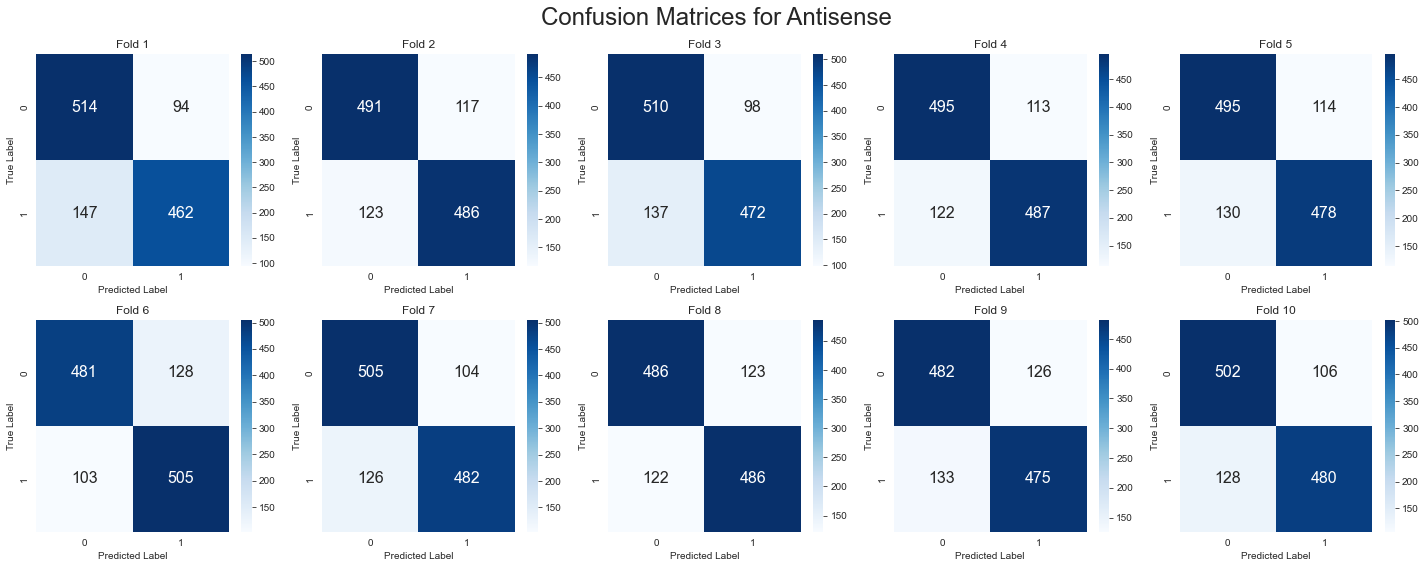

In [130]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [131]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced ganji promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-2.18,-1.42,-2.81,-1.52,-2.81,-1.42,-1.76,-1.76,-2.18,...,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-2.17,-2.18,-1.44,1
1,-2.17,-2.18,-1.44,-1.95,-1.95,-2.17,-1.95,-1.95,-1.52,-2.81,...,-1.44,-1.46,-2.99,-1.46,-1.95,-1.52,-2.17,-1.44,-2.99,1
2,-1.76,-1.76,-2.99,-1.76,-1.44,-2.17,-1.44,-2.99,-1.44,-1.46,...,-1.46,-2.99,-1.44,-1.95,-2.17,-1.95,-1.44,-2.99,-1.46,1
3,-2.81,-1.44,-1.95,-2.81,-1.46,-1.44,-2.18,-2.17,-1.95,-1.52,...,-1.95,-1.95,-2.81,-1.42,-2.18,-1.95,-1.95,-2.17,-2.18,1
4,-1.46,-2.18,-1.46,-1.95,-1.95,-1.52,-1.95,-1.95,-2.17,-2.18,...,-2.81,-1.44,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-2.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-1.76,-2.99,-1.76,-1.76,-1.44,-2.81,-1.42,-1.76,-2.99,-1.42,...,-1.44,-1.95,-2.81,-1.46,-2.18,-1.76,-1.76,-1.42,-1.76,0
12126,-1.76,-1.42,-2.18,-2.81,-1.42,-2.99,-1.44,-1.95,-1.46,-2.99,...,-1.76,-2.99,-1.42,-2.18,-1.95,-2.81,-1.76,-1.42,-2.99,0
12127,-1.95,-1.46,-2.18,-1.95,-1.46,-2.18,-2.81,-1.76,-1.42,-2.18,...,-1.44,-2.81,-1.42,-2.99,-1.76,-1.44,-2.81,-1.76,-1.44,0
12128,-2.99,-1.76,-1.42,-2.18,-1.95,-1.46,-2.18,-2.81,-1.76,-1.44,...,-2.99,-1.42,-1.76,-2.18,-2.17,-2.18,-1.42,-1.76,-2.99,0


In [132]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [133]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8029678483099753, Precision: 0.8285714285714286, Recall: 0.7644151565074135, F1 Score: 0.7952013710368467, MCC: 0.6077880915872306, Specificity: 0.8256578947368421
Fold 2/10
 Accuracy: 0.8004946413849959, Precision: 0.8241563055062167, Recall: 0.7644151565074135, F1 Score: 0.7931623931623932, MCC: 0.6026005596112539, Specificity: 0.8415841584158416
Fold 3/10
 Accuracy: 0.8120362737015664, Precision: 0.8307155322862129, Recall: 0.7841845140032949, F1 Score: 0.8067796610169491, MCC: 0.6250725406724245, Specificity: 0.8366336633663366
Fold 4/10
 Accuracy: 0.8161582852431987, Precision: 0.8356643356643356, Recall: 0.7874794069192751, F1 Score: 0.8108566581849023, MCC: 0.6333892592529492, Specificity: 0.8399339933993399
Fold 5/10
 Accuracy: 0.7774113767518549, Precision: 0.794066317626527, Recall: 0.7495881383855024, F1 Score: 0.771186440677966, MCC: 0.555716843766599, Specificity: 0.8448844884488449
Fold 6/10
 Accuracy: 0.8186314921681781, Precision: 0.83506944444444

In [134]:
internal_accuracy

[0.8029678483099753,
 0.8004946413849959,
 0.8120362737015664,
 0.8161582852431987,
 0.7774113767518549,
 0.8186314921681781,
 0.8178070898598516,
 0.7938994229183842,
 0.8186314921681781,
 0.8285243198680956]

In [135]:
internal_precision

[0.8285714285714286,
 0.8241563055062167,
 0.8307155322862129,
 0.8356643356643356,
 0.794066317626527,
 0.8350694444444444,
 0.8268251273344652,
 0.8156028368794326,
 0.8409893992932862,
 0.8491228070175438]

In [136]:
internal_recall

[0.7644151565074135,
 0.7644151565074135,
 0.7841845140032949,
 0.7874794069192751,
 0.7495881383855024,
 0.7937293729372937,
 0.8036303630363036,
 0.759075907590759,
 0.7854785478547854,
 0.7986798679867987]

In [137]:
internal_specificity

[0.8256578947368421,
 0.8415841584158416,
 0.8366336633663366,
 0.8399339933993399,
 0.8448844884488449,
 0.8052805280528053,
 0.8434925864909391,
 0.8319604612850082,
 0.828665568369028,
 0.8517298187808896]

In [138]:
internal_f1_score

[0.7952013710368467,
 0.7931623931623932,
 0.8067796610169491,
 0.8108566581849023,
 0.771186440677966,
 0.8138747884940779,
 0.8150627615062761,
 0.7863247863247862,
 0.8122866894197952,
 0.8231292517006802]

In [139]:
internal_mcc

[0.6077880915872306,
 0.6026005596112539,
 0.6250725406724245,
 0.6333892592529492,
 0.555716843766599,
 0.6380290213068287,
 0.635855356676255,
 0.589189632738159,
 0.6386336105268162,
 0.6581922499157661]

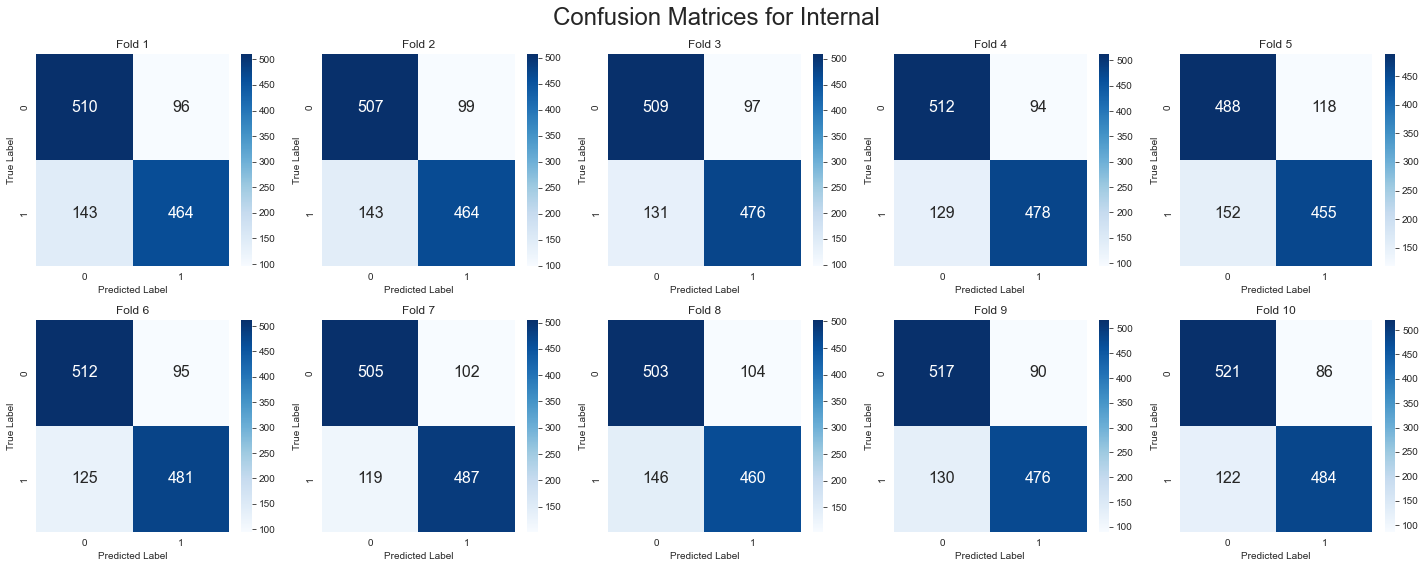

In [140]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
